PROBLEM

Using the sklearn implementation of LinearRegression(), create a test and train set from your housing data. To begin, fit a linear model on the Logarithm of the sales column with the GrLivArea feature. Use this as your baseline to compare your transformations to.

Include the transformations from above into a second linear model and try it out on the test set. Did the performance improve with your adjustments and transformations?

Add polynomial features into the mix and see if you can get better improvement still.

In [4]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#variables
#https://ww2.amstat.org/publications/jse/v19n3/decock/datadocumentation.txt

In [6]:
ames = pd.read_csv('data/ames_housing.csv')

In [7]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [8]:
#missing values:
#LotFrontage      1201 non-null float64 --> filled nas with 0.0
#Alley            91 non-null object --> filled nas with none
#MasVnrType       1452 non-null object --> filled nas with none
#MasVnrArea       1452 non-null float64 --> filled nas with 0.0
#BsmtQual         1423 non-null object --> filled nas with none
#BsmtCond         1423 non-null object --> filled nas with none
#BsmtExposure     1422 non-null object #iloc948
#BsmtFinType1     1423 non-null object --> filled nas with none
#BsmtFinType2     1422 non-null object #ilco332
#Electrical       1459 non-null object    drop??
#FireplaceQu      770 non-null object --> filled nas with none
#GarageType       1379 non-null object --> filled nas with none
#GarageYrBlt      1379 non-null float64                       !??!
#GarageFinish     1379 non-null object --> filled nas with none
#GarageQual       1379 non-null object --> filled nas with none
#GarageCond       1379 non-null object --> filled nas with none
#PoolQC           7 non-null object --> filled nas with none
#Fence            281 non-null object --> filled nas with none
#MiscFeature      54 non-null object --> filled nas with none

In [9]:
ames['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [10]:
ames['Alley'] = ames['Alley'].fillna('None')

In [11]:
ames['MiscFeature'] = ames['MiscFeature'].fillna('None')

In [12]:
ames['FireplaceQu'] = ames['FireplaceQu'].fillna('None')

In [13]:
ames['PoolQC'] = ames['PoolQC'].fillna('None')

In [14]:
ames['Fence'] = ames['Fence'].fillna('None')

In [15]:
ames['GarageType'] = ames['GarageType'].fillna('None')

In [16]:
ames['GarageCond'] = ames['GarageCond'].fillna('None')

In [17]:
ames['GarageQual'] = ames['GarageQual'].fillna('None')

In [18]:
ames['GarageFinish'] = ames['GarageFinish'].fillna('None')

In [19]:
ames['MasVnrType'] = ames['MasVnrType'].fillna('None')

In [20]:
ames['MasVnrArea'] = ames['MasVnrArea'].fillna(0.0)

In [21]:
ames['LotFrontage'] = ames['LotFrontage'].fillna(0.0)

In [22]:
ames[(ames['BsmtExposure'].isnull()) & (ames['BsmtCond'].notnull())]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
948,949,60,RL,65.0,14006,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Normal,192500


In [23]:
ames.loc[[948]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 948 to 948
Data columns (total 81 columns):
Id               1 non-null int64
MSSubClass       1 non-null int64
MSZoning         1 non-null object
LotFrontage      1 non-null float64
LotArea          1 non-null int64
Street           1 non-null object
Alley            1 non-null object
LotShape         1 non-null object
LandContour      1 non-null object
Utilities        1 non-null object
LotConfig        1 non-null object
LandSlope        1 non-null object
Neighborhood     1 non-null object
Condition1       1 non-null object
Condition2       1 non-null object
BldgType         1 non-null object
HouseStyle       1 non-null object
OverallQual      1 non-null int64
OverallCond      1 non-null int64
YearBuilt        1 non-null int64
YearRemodAdd     1 non-null int64
RoofStyle        1 non-null object
RoofMatl         1 non-null object
Exterior1st      1 non-null object
Exterior2nd      1 non-null object
MasVnrType       1 non-nul

In [24]:
ames[(ames['BsmtFinType2'].isnull()) & (ames['BsmtFinType1'].notnull())]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
332,333,20,RL,85.0,10655,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,10,2009,WD,Normal,284000


In [25]:
ames.iloc[[332]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 332 to 332
Data columns (total 81 columns):
Id               1 non-null int64
MSSubClass       1 non-null int64
MSZoning         1 non-null object
LotFrontage      1 non-null float64
LotArea          1 non-null int64
Street           1 non-null object
Alley            1 non-null object
LotShape         1 non-null object
LandContour      1 non-null object
Utilities        1 non-null object
LotConfig        1 non-null object
LandSlope        1 non-null object
Neighborhood     1 non-null object
Condition1       1 non-null object
Condition2       1 non-null object
BldgType         1 non-null object
HouseStyle       1 non-null object
OverallQual      1 non-null int64
OverallCond      1 non-null int64
YearBuilt        1 non-null int64
YearRemodAdd     1 non-null int64
RoofStyle        1 non-null object
RoofMatl         1 non-null object
Exterior1st      1 non-null object
Exterior2nd      1 non-null object
MasVnrType       1 non-nul

In [26]:
ames['BsmtQual'] = ames['BsmtQual'].fillna('None')

In [27]:
ames['BsmtCond'] = ames['BsmtCond'].fillna('None')

In [28]:
ames['BsmtFinType1'] = ames['BsmtFinType1'].fillna('None')

In [29]:
#objects need to be associated with values
#MSZoning         1460 non-null object X
#Street           1460 non-null object
#Alley            1460 non-null object
#LotShape         1460 non-null object X
#LandContour      1460 non-null object X
#Utilities        1460 non-null object 
#LotConfig        1460 non-null object X
#LandSlope        1460 non-null object X
#Neighborhood     1460 non-null object -->dummy variables
#Condition1       1460 non-null object X
#Condition2       1460 non-null object X
#BldgType         1460 non-null object -->dummy variables
#HouseStyle       1460 non-null object X
#RoofStyle        1460 non-null object
#RoofMatl         1460 non-null object
#Exterior1st      1460 non-null object X
#Exterior2nd      1460 non-null object X
#MasVnrType       1460 non-null object
#ExterQual        1460 non-null object -->cardinal
#ExterCond        1460 non-null object -->cardinal
#Foundation       1460 non-null object 
#BsmtQual         1460 non-null object -->cardinal
#BsmtCond         1460 non-null object -->cardinal 
#BsmtExposure     1422 non-null object
#BsmtFinType1     1460 non-null object
#BsmtFinType2     1422 non-null object
#Heating          1460 non-null object
#HeatingQC        1460 non-null object -->cardinal
#CentralAir       1460 non-null object
#Electrical       1460 non-null object
#KitchenQual      1460 non-null object -->cardinal
#Functional       1460 non-null object
#FireplaceQu      1460 non-null object -->cardinal
#GarageType       1460 non-null object !
#GarageFinish     1460 non-null object
#GarageQual       1460 non-null object -->cardinal
#GarageCond       1460 non-null object -->cardinal
#PavedDrive       1460 non-null object 
#PoolQC           1460 non-null object -->cardinal
#Fence            1460 non-null object
#MiscFeature      1460 non-null object
#SaleType         1460 non-null object
#SaleCondition    1460 non-null object

In [30]:
card_dict = {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5}

In [31]:
ames = ames.replace({'BsmtCond': card_dict})

In [32]:
ames = ames.replace({'BsmtQual': card_dict})

In [33]:
ames = ames.replace({'HeatingQC': card_dict})

In [34]:
ames = ames.replace({'ExterQual': card_dict})

In [35]:
ames = ames.replace({'ExterCond': card_dict})

In [36]:
ames = ames.replace({'KitchenQual': card_dict})

In [37]:
ames = ames.replace({'FireplaceQu': card_dict})

In [38]:
ames = ames.replace({'GarageQual': card_dict})

In [39]:
ames = ames.replace({'GarageCond': card_dict})

In [40]:
ames = ames.replace({'PoolQC': card_dict})

In [ ]:
#pd.get_dummies(data = ames, columns = ['Neighborhood'], drop_first = True)

In [42]:
#pd.get_dummies(data = ames, columns = ['BldgType'])

In [43]:
ames['OverallBsmt'] = ames['BsmtCond'] * ames['BsmtQual']

In [44]:
ames['OverallExterior'] = ames['ExterCond'] * ames['ExterQual']

In [45]:
ames['OverallGarage'] = ames['GarageCond'] * ames['GarageQual']

In [46]:
#ames.groupby(['Neighborhood', 'HouseStyle'])[['SalePrice']].mean().sort_values(by = 'SalePrice', ascending = False)

In [47]:
#ames[ames['Neighborhood']=='StoneBr'].sort_values(by='SalePrice')

In [48]:
amescorr = ames.corr()

In [49]:
amescorr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice,OverallBsmt,OverallExterior,OverallGarage
Id,1.000000,0.011156,-0.019761,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,0.005039,...,0.001330,0.057044,0.047655,-0.006242,0.021172,0.000712,-0.021917,-0.020870,0.019353,0.007794
MSSubClass,0.011156,1.000000,-0.215023,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,0.016178,...,-0.026030,0.008283,0.014198,-0.007683,-0.013585,-0.021407,-0.084284,0.044731,-0.019898,-0.073792
LotFrontage,-0.019761,-0.215023,1.000000,0.100739,0.176561,-0.053457,0.036853,0.078686,0.105010,0.127864,...,0.022969,0.114106,0.150254,-0.059606,0.018942,-0.012094,0.209624,0.087495,0.080236,0.010002
LotArea,-0.033226,-0.139781,0.100739,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.055570,...,0.043160,0.077672,0.091727,0.038068,0.001205,-0.014261,0.263843,0.072298,0.054967,0.075573
OverallQual,-0.028365,0.032628,0.176561,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.726278,...,0.064886,0.065166,0.083690,-0.031406,0.070815,-0.027347,0.790982,0.615126,0.605154,0.293340
OverallCond,0.012609,-0.059316,-0.053457,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.138942,...,0.054811,-0.001985,-0.013646,0.068777,-0.003511,0.043950,-0.077856,-0.116558,0.098111,0.024858
YearBuilt,-0.012713,0.027850,0.036853,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.598160,...,-0.050364,0.004950,0.002113,-0.034383,0.012398,-0.013618,0.522897,0.606825,0.428501,0.306358
YearRemodAdd,-0.021998,0.040581,0.078686,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.587318,...,-0.038740,0.005829,0.010059,-0.010286,0.021490,0.035743,0.507101,0.503145,0.520120,0.153298
MasVnrArea,-0.051071,0.023573,0.105010,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.345329,...,0.062248,0.011928,0.015073,-0.029512,-0.006723,-0.008317,0.472614,0.259666,0.273882,0.133899
ExterQual,0.005039,0.016178,0.127864,0.055570,0.726278,-0.138942,0.598160,0.587318,0.345329,1.000000,...,0.012688,0.034766,0.051950,-0.039310,0.042790,-0.006745,0.682639,0.556488,0.839051,0.215833


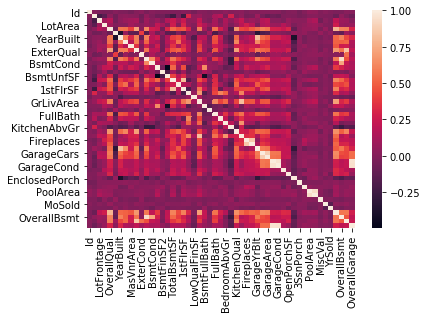

In [50]:
sns.heatmap(amescorr)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a11b8cb38>,
        ...,
        ...,
        ...,
       ...,
        ...,
        ...,
        ...,
      dtype=object)

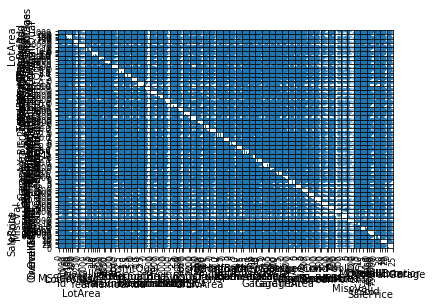

In [51]:
from pandas.plotting import scatter_matrix
scatter_matrix(ames)

In [52]:
ames2 = ames[['OverallBsmt','YrSold', 'OverallGarage', 'OverallExterior', 'KitchenQual', 'HeatingQC', 'PoolQC' , 'Neighborhood', 'BldgType']]


In [53]:
corr2 = ames2.corr()

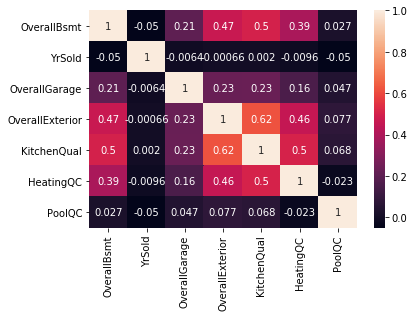

In [54]:
sns.heatmap(corr2, annot = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3f3aa198>,
      dtype=object)

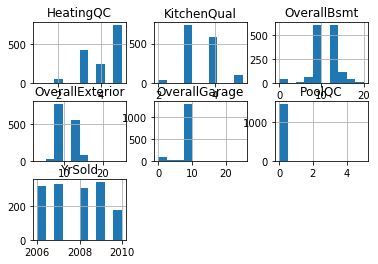

In [55]:
ames2.hist()

In [56]:
dum = pd.get_dummies(ames2)

In [57]:
#graphing predictions against data
#ads.plot(x = 'TV', y = 'sales', kind = 'scatter')
#plt.scatter(ads['TV'], y = model.predict(X), color = 'red', alpha = 0.2 )

In [58]:
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [59]:
X = dum
y = ames.SalePrice
lr = LinearRegression()
lr.fit(X, y)
p = lr.predict(X)
mse = mean_squared_error(p, y)
rmse = np.sqrt(mse)
print(mse, rmse)

print(lr.coef_)


X.columns

1809776234.5326967 42541.46488465926
[  5091.13163925   -520.80541404   2237.71489196   4620.02470847
  29969.02338012   4078.08655513  19895.02437855  12232.06931428
  18140.53920857  10322.47770332 -38403.77334124  14985.93714336
 -23904.95123616  16002.13278684 -42334.79226897 -22044.9554558
 -57976.82663157 -13948.06931317 -29023.73702102 -31373.99080611
  28144.34214979  -5962.98174996  92641.87142703  70633.07755256
 -48390.93622645 -28278.54735419 -40250.46418276 -16520.32768792
   7101.96814281  85463.0124992   14271.93306494  28474.9922826
  22140.99600433  38658.40849633  32240.25587489 -54694.21959609
 -38345.44077946]


Index(['OverallBsmt', 'YrSold', 'OverallGarage', 'OverallExterior',
       'KitchenQual', 'HeatingQC', 'PoolQC', 'Neighborhood_Blmngtn',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker',
       'BldgType_1Fam', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs',
       'BldgType_TwnhsE'],
      dtype='object')

In [60]:
#GrLivArea base predictions
lr = LinearRegression()
lr.fit(ames.GrLivArea.values.reshape(-1,1), ames.SalePrice)
predtest = lr.predict(ames.GrLivArea.values.reshape(-1,1))
mse = mean_squared_error(predtest, ames.SalePrice)
rmse = np.sqrt(mse)
print(mse, rmse)

3139843209.6665273 56034.303865279944


In [61]:
#regression testing what whaaat
#variables to include: OverallBasement, Overall Garage, overall exterior
#kitchen quality, pool qc, year sold, 
#on sale price
#dummies?? how to add...
lr = LinearRegression()
X = ames[['OverallBsmt','YrSold', 'OverallGarage', 'OverallExterior', 'KitchenQual', 'HeatingQC', 'PoolQC']]
y = ames.SalePrice
lr.fit(X, y)
p = lr.predict(X)
mse = mean_squared_error(p, ames.SalePrice)
rmse = np.sqrt(mse)
print (mse, rmse)
print (lr.coef_, lr.intercept_)

2855524305.3975196 53437.106072442955
[ 7124.47970662  -736.1022033   2740.56509618  6713.87123103
 44381.57966457  3635.44939473 18334.45609264] 1319175.040883514


In [63]:
from sklearn.preprocessing import PolynomialFeatures
#adding pipeline?
model = Pipeline([('poly', PolynomialFeatures(3)),
                 ('linear', LinearRegression(fit_intercept= False))])

In [64]:
#adding polynomial degrees..
from sklearn.preprocessing import PolynomialFeatures

In [65]:
poly_features = PolynomialFeatures(degree=2, include_bias = False)
X = ames[['OverallBsmt','YrSold', 'OverallGarage', 'OverallExterior', 'KitchenQual', 'HeatingQC', 'PoolQC']]
X_poly = poly_features.fit_transform(X)
X_poly[0]
y = ames.SalePrice
lr.fit(X_poly,y)
p = lr.predict(X_poly)
mse = mean_squared_error(p, y)
rmse = np.sqrt(mse)
print(mse, rmse)
#print(lr.coef_, lr.intercept_)

2341274221.3225694 48386.7153392599


In [66]:
poly_features = PolynomialFeatures(degree=3, include_bias = False)
X = ames[['OverallBsmt','YrSold', 'OverallGarage', 'OverallExterior', 'KitchenQual', 'HeatingQC', 'PoolQC']]
X_poly = poly_features.fit_transform(X)
X_poly[0]
y = ames.SalePrice
lr.fit(X_poly,y)
p = lr.predict(X_poly)
mse = mean_squared_error(p, y)
rmse = np.sqrt(mse)
print(mse, rmse)
#print(lr.coef_, lr.intercept_)

2192817182.354766 46827.525904693764


In [67]:
#taking from class - Poly features, grid search, scaling
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [68]:
#x = dum #--> dummy variables for my str's
#y = ames.SalePrice
#X_train, X_test, y_train, y_test = train_test_split(x,y)

In [71]:
#pipe = make_pipeline(PolynomialFeatures(), LinearRegression())
#degrees = {'polynomialfeatures__degree': [i for i in range(1,10)]}
#grid = GridSearchCV(pipe, param_grid = degrees)
#best = grid.best_estimator_

In [83]:
x = ames[['OverallBsmt','PoolQC', 'OverallGarage']]
y = ames.SalePrice
X_train, X_test, y_train, y_test = train_test_split(x,y)

In [84]:
pipe = make_pipeline(PolynomialFeatures(), LinearRegression())
degrees = {'polynomialfeatures__degree': [i for i in range(1,5)]}
grid = GridSearchCV(pipe, param_grid = degrees)

In [85]:
grid.fit(X_train, y_train)
best = grid.best_estimator_

In [86]:
best.fit(X_train, y_train)
pred = best.predict(X_test)
np.sqrt(mean_squared_error(pred, y_test))

65486.355083592134

In [87]:
best

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=1, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [89]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [90]:
#instantiate
std_scaled = StandardScaler()
minmax_scaled = MinMaxScaler()

In [91]:
#ames2.head()

,OverallBsmt,YrSold,OverallGarage,OverallExterior,KitchenQual,HeatingQC,PoolQC,Neighborhood,BldgType
0,12,2008,9,12,4,5,0,CollgCr,1Fam
1,12,2007,9,9,3,5,0,Veenker,1Fam
2,12,2008,9,12,4,5,0,CollgCr,1Fam
3,12,2006,9,9,4,4,0,Crawfor,1Fam
4,12,2008,9,12,4,5,0,NoRidge,1Fam


In [93]:
#need to drop my non numeric values
#cols = ames2
#std_df = std_scaled.fit_transform(ames2[[name for name in cols]])
#minmax_df = minmax_scaled.fit_transform(ames2[[name for name in cols]])
#pd.DataFrame(std_df)
#pd.DataFrame(minmax_df)

In [96]:
#using transformations
#first getting numeric data only
ames2numeric = ames.select_dtypes(include = 'int64')

In [97]:
from sklearn.linear_model import Ridge

In [98]:
X = ames2numeric
y = ames['SalePrice']

In [100]:
#train test split!
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [105]:
#scale --> using standard scalar
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

In [106]:
#because we are only feeding it the ridge we don't have to tell it..??

ridge = Ridge()
params = {'alpha': [0.1, 0.7, 1.0, 3.0, 10]} #random


In [109]:
from sklearn.model_selection import GridSearchCV

In [113]:
#pass model and the numbers to tune the dial to
grid = GridSearchCV(ridge, param_grid=params)
#this creates the empty model - we are instantiating
#always fit after instantiating
grid.fit(X_train_scaled, y_train)


GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.1, 0.7, 1.0, 3.0, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [115]:
grid.best_estimator_

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [117]:
best = grid.best_estimator_

In [120]:
best.fit(X_train_scaled, y_train)
pred = best.predict(X_test_scaled)
mse = mean_squared_error(pred, y_test)
rmse = np.sqrt(mse)
print('MSE: ', mse, '\nRMSE: ', rmse, '\nr2', best.score(X_test_scaled, y_test))

MSE:  8339050.610899394 
RMSE:  2887.7414376809074 
r2 0.998745269055726
